**PCA - метод главных компонент**

*Метод главных компонент* - один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

- Метод главных компонент работает только с признаками
- Для него не важна целевая переменная (если она есть)
- Таким образом, метод главных компонент - это обучение без учителя

**Постановка задачи**
- $f_{1}(x), ... , f_{n}(x)$ - исходные признаки
- $g_{1}(x), ... , f_{m}(x)$ - новые числовые признаки, $n \geq m$

Мы хотим, чтобы новые числовые признаки $g_{i}(x)$ линейно выражались через исходные
признаки $f_{i}(x)$ при этом чтобы исходные признаки также линейно восстанавливались по
новым признакам. При этом мы хотим, чтобы при переходе к новым признакам было
потеряно наименьшее количество исходной информации.

Посмотрим, как работает метод PCA на плоскости. Сгенерируем выборку из двухмерного гауссовского распределения. Сделаем один признак наиболее значимым и проверим: найдет ли PCA его или нет.

**Описание структуры исходных данных**
- $f_{1}(x), ... , f_{n}(x)$ - исходные признаки
- $g_{1}(x), ... , f_{m}(x)$ - новые числовые признаки, $n \geq m$

Обозначим $X$ - матрица объекты-признаки, с нулевым средним каждого признака, а $w$ - некоторый единичный вектор. Тогда $X_w$ задает величину проекций всех объектов на этот вектор. Далее ищется вектор, который дает наибольшую дисперсию полученных проекций (то есть наибольшую дисперсию вдоль этого направления):

\begin{equation*}
\begin{split}
\max_{w:||w|| = 1}||X_w||^2 = \max_{w:||w||=1}X^TX_w
\end{split}
\end{equation*}

Подходящий вектор тогда равен собственному вектору матрицы $X^TX$ с наибольшим собственным значением. После этого все пространство проецируется на ортогональное дополнение к вектору $w$ и процесс повторяется.

**Описание используемых функций и их параметров**

def PCA_show(dataset) - функция, которая визуализирует метод PCA для набора данных.
>- dataset - набор данных

np.random.multivariate_normal(mean=[0, 0], cov=[[4, 0], [0, 1]], size=1000) - создает  случайные выборки из многомерного нормального распределения.
>- mean - Среднее значение N-мерного распределения.
>- cov - Ковариационная матрица распределения.
>- size - размер выборки

**Решение задачи**

Генерируем выборку двухмерного гауссовского распределения. Обратите внимание, что выборка изначально выбирается центрированной! Делаем один признак наиболее значимым.


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314512)

data_synth_1 = np.random.multivariate_normal(
    mean=[0, 0], 
    cov=[[4, 0], 
         [0, 1]],
    size=1000)

Теперь изобразим точки выборки на плоскости и применим к ним PCA для нахождения главных компонент. В результате работы PCA из sklearn в dec.components_ будут лежать главные направления (нормированные), а в dec.explained_variance_ - дисперсия, которую объясняет каждая компонента. Изобразим на нашем графике эти направления, умножив их на дисперсию для наглядного отображения их значимости.

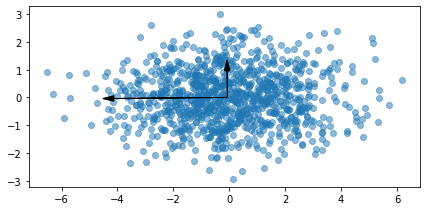

In [ ]:
from sklearn.decomposition import PCA


def PCA_show(dataset):
    plt.scatter(*zip(*dataset), alpha=0.5)
    
    dec = PCA()
    dec.fit(dataset)
    ax = plt.gca()
    for comp_ind in range(dec.components_.shape[0]):
        component = dec.components_[comp_ind, :]
        var = dec.explained_variance_[comp_ind]
        start, end = dec.mean_, component * var
        ax.arrow(start[0], start[1], end[0], end[1],
                 head_width=0.2, head_length=0.4, fc='k', ec='k')
    
    ax.set_aspect('equal', adjustable='box')

plt.figure(figsize=(7, 7))
PCA_show(data_synth_1)

Повернем наши данные на некоторый фиксированный угол.

**Визуализация результата**

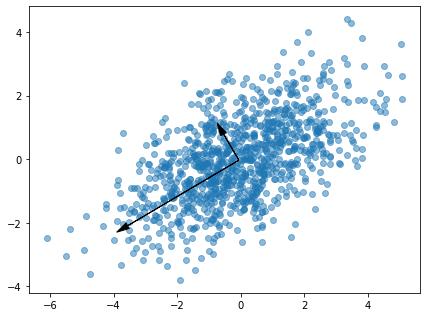

In [ ]:
angle = np.pi / 6
rotate = np.array([
        [np.cos(angle), - np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
    ])
data_synth_2 = rotate.dot(data_synth_1.T).T

plt.figure(figsize=(7, 7))
PCA_show(data_synth_2)

**Интерпретация результата**

Метод PCA нашел все правильно, несмотря на поворот данных. 

Получившийся результат означает, что  новые признаки дают более высокое качество классификации, и их можно использовать для компактного хранения данных. Например, сжимать фотографии. Для этого объекты трансформируются в новое пространство, и из него выкидываются самые незначимые признаки.

**Задания для самостоятельной работы**

Объяснить, почему так произошло

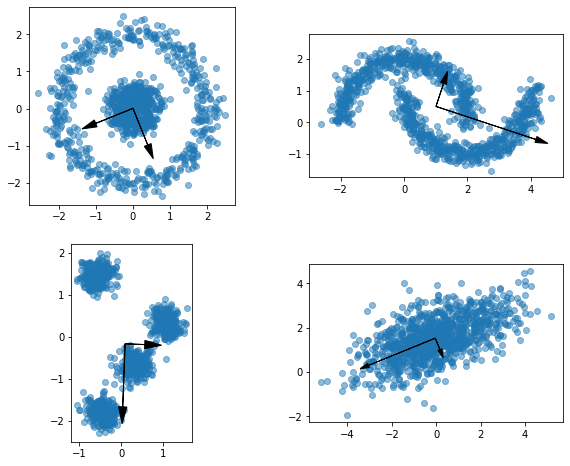

In [ ]:
from sklearn.datasets import make_circles, make_moons, make_blobs

np.random.seed(54242)
data_synth_bad = [
    make_circles(n_samples=1000, factor=0.2, noise=0.1)[0]*2,
    make_moons(n_samples=1000, noise=0.1)[0]*2,
    make_blobs(n_samples=1000, n_features=2, centers=4)[0]/5,
    np.random.multivariate_normal(
        mean=[0, 1.5], 
        cov=[[3, 1], 
             [1, 1]],
        size=1000),
]


plt.figure(figsize=(10, 8))
rows, cols = 2, 2
for i, data in enumerate(data_synth_bad):
    plt.subplot(rows, cols, i + 1)
    PCA_show(data)
    plt.gca().set_aspect('equal', adjustable='box')